### Importing Relevant Packages

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

### Loading and Transforming the Data

In [14]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')



### Removing Surplus Data

In [15]:
df_comp['market_value']=df_comp.spx

In [16]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Correlation $\rho (x,y)$

Measures the similarity in the change of values of two series.

### White Noise

It is a special type of *time-series*, where the data does not follow a pattern, so it is unpredictable. White noise satisfies the following three conditions:

- Constant mean $\mu = 0$
- Constant variance $\sigma^{2}$
- No autocorrelation $\rho$ for any period (no clear relationship between past and present values) $Cov(x_{n} , x_{n+k}) = Corr(x_{m} , x_{m+k})\sigma_{1}\sigma_{2} = 0$.

Since it's random, it can't be properly estimated by any type of model, hence - it's impossible to predict. Therefore, we need to be able to recognize when data is simply noise because:

A) We can't model it. Hence, if the residuals of a model are white noise, then it's a good estimator and complicating the model further will be fitting it to the data, rather than the other way around.

B) White noise is just a specific type of noise which has given characteristics. It's also know as Gaussian noise and has a mean of 0. There exist other forms of noise, but they aren't of our interest right now.

In [36]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

We used a random Normal Distribution, because Gaussian White Noise is the most commonly used for such randomization. Of course, you can make the case for using other distributions when creating the white noise data, as long as your time series resembles said distribution more than the normal one.

We're simply creating shifting the mean, so that the result can be closer in magnitude to the actual data. You can think of if as White Noise we moved 1090-units up, so that we see what WN-esque prices would look like.

In [37]:
df['wn'] = wn

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df.describe()

,market_value,wn,rw
count,5021.000000,5021.000000,5021.000000
mean,1091.651926,1093.574604,1269.944293
std,292.559287,289.854230,444.216793
min,438.920000,-29.392671,585.483034
25%,914.620000,898.222839,931.550429
50%,1144.650000,1097.401825,1156.363045
75%,1316.280729,1284.671294,1488.362029
max,1570.252238,2242.964575,2715.508720


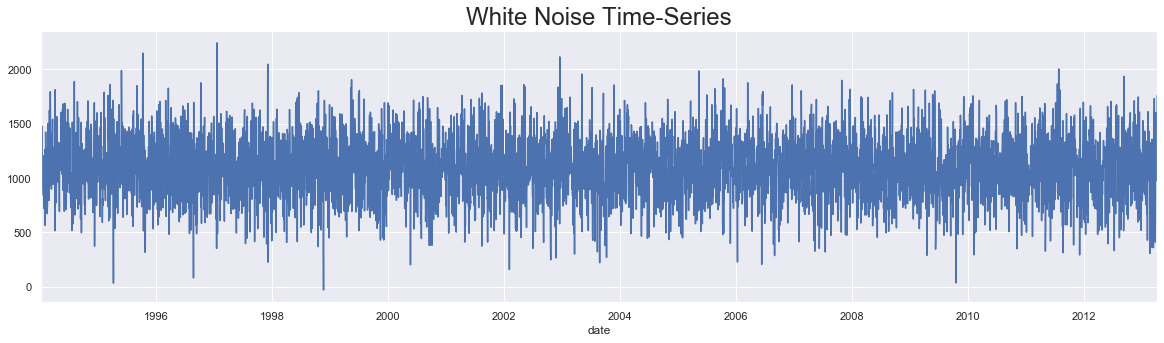

In [39]:
df.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

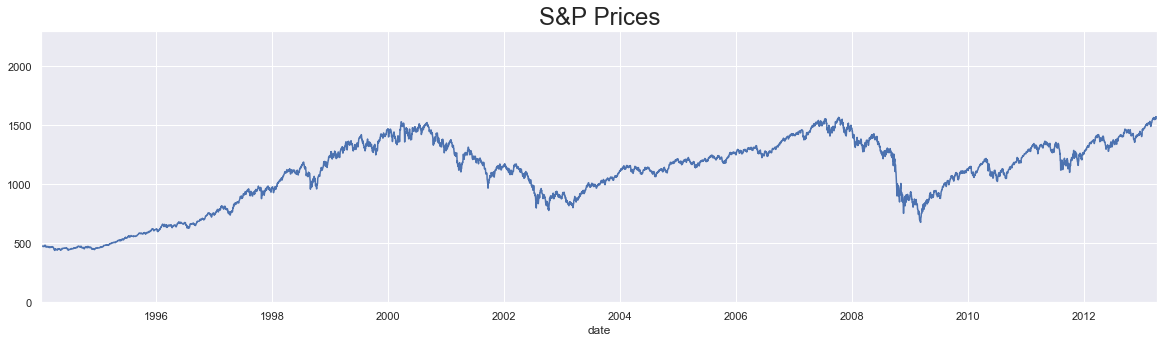

In [21]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P Prices", size = 24)
plt.ylim(0,2300)
plt.show()

### Random Walk

A special type of *time-series*, where values tend to persist over time and the differences between periods are simply white noise. Random walk is a time series distribution in which the general pattern(on the larger scale) is persistent through out, but when we look at the smaller scale(smaller periods), then we see no persistency in patterns i.e. a white noise.

En su forma más general, las caminatas aleatorias son cualquier proceso aleatorio donde la posición de una partícula en cierto instante depende solo de su posición en algún instante previo y alguna variable aleatoria que determina su subsecuente dirección y la longitud de paso. In short, if a time-series resembles a RW, it cannot be predicted well by only using past values.

However, since we know that some general pattern can be predicted among the S&P values (which we expect to persist in the future), then it's not a random walk.

In [22]:
rw = pd.read_csv("RandWalk.csv")
rw.date = pd.to_datetime(rw.date, dayfirst = True)
rw.set_index("date", inplace = True)
rw = rw.asfreq('b')

In [23]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [24]:
df['rw'] = rw.price

C:\Users\Usuario\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,1112.632391,1122.139662
1994-01-10,475.27,1093.039421,1080.347860
1994-01-11,474.13,1786.466459,1082.095245
1994-01-12,474.17,1027.107026,1083.639265
1994-01-13,472.47,950.980303,1067.146255


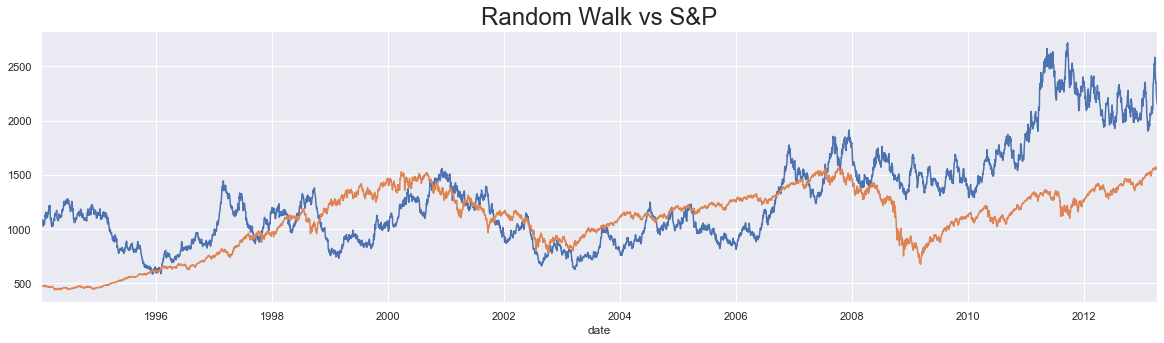

In [26]:
df.rw.plot(figsize = (20,5))
df.market_value.plot()
plt.title("Random Walk vs S&P", size = 24)
plt.show()

They look similar because they have small variations between consecutive time periods, cuclical increases and decreases in short periods of time.

### **Market Efficiency**

Measures the level of difficulty in forecasting correct future values.
Market efficiency means that there are no arbitrage opportunities. Arbitrage means that you can buy and sell stocks in such a manner that you make riks-free guaranteed profits on your investments. In other words, you are making money without any risk whatsoever.

This can occur, when the buying and selling prices haven't adjusted (theory suggests that they adjust depending on the demand for the product/good) to reflect some change in the market, or other important factor.

Thus, in short, a market is considered efficient if it can't be easily exploited this way. Thus, if an investor can accurately predict what the price of a market index or stock is going to be, then they can exploit the market and make a safe profit. This cannot occur in an efficient market. Therefore, the returns coming from an efficient market should be close to 0 since we don't expect to be making any significant risk-free profit.

Now, the market indexes we are using (like the S&P) represent the state of a market (the US market in the case of the S&P) rather than the price of a single stock, so they should be yielding returns close to 0, since the market is efficient.

### Stationarity

There are different kind of stationary as we will see below

**Weak-Form Stationary or Covariance Stationary:** If we take two samples, $S_{1} \, \& \, S_{2}$, with same size, they must satisfy the following assumptions:

- $Cov(S_{1}) = Cov(S_{2})$ or $Cov(x_{n},x_{n+k} = Cov(x_{m},x_{m+k})$, e.g., $Cov(x_{1},x_{4})=Cov(x_{3},x_{6})$.
- Constant mean $\mu$.
- Constant covariance $\sigma^{2}$.

Notice that **White-Noise** satisfy these conditions.

**Strict Stationary:** Take the same sample $S_{I} \, \& \, S_{2}$ that satisfay the aconditions above and also must have the same distribution:

- $S_{1} = (x_{t},x_{t+k}) \sim Dist(\mu , \sigma^{2})$.
- $S_{2} = (x_{t + \tau},x_{t+ \tau + k}) \sim Dist(\mu , \sigma^{2})$.

This kind of tationary *time-series* are rarely observed in nature. Hence, in aalytics it is universally accepted to use station parity to describe covariance station parity.

### **Dickey-Fuller Test**

In statistics, the Dickey–Fuller test tests the null hypothesis that a unit root is present in an autoregressive model. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity. It is named after the statisticians David Dickey and Wayne Fuller, who developed the test in 1979. In this case

- $H_{0}$ is a unit root (non-stationary).
- $H_{A}$ is stationary.

Set up an autoregressive model for $y_{t}$ and test if $\theta(1) = 0$. Consider the **AR(1)** regression model

$$
y_{t} = \theta y_{t-1} + \epsilon_{t}.
$$

The unit root null hypothesis against the stationary alternative corresponds to

- $H_{0} : \theta=1$
- $H_{A}:\theta<1$.

Podemos aplicar esta prueba por medio del método **adfuller()** :

In [27]:
sts.adfuller(df.market_value)

(-1.7369847452352423,
 0.41216456967706283,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

Se escribirán en orden lo que devuelve cada renglón del test anterior:
- Estadístico $t$.
- $\rho$ value asociado al estadístico $t$.
- Number of lags use in the regression when determining the $t$ statistic.
- Number of observations used in the analysis and depends on the number of lags used in the regression.
- Critical values or levels of significance from the *Dickey-Fuller* table ($1,5,10\%$).
- Estimates the maximized information criteria provided.

$t$ statistic is greater than all of these levels of significance, so we do not find sufficient evidence of **stationarity** in the *dataset*. $\rho$ value equals $0.41$, this suggests there is roughly a $40\%$ hance of not rejecting the null.

In [40]:
sts.adfuller(df.wn)

(-20.957497256959865,
 0.0,
 10,
 5010,
 {'1%': -3.4316559188949403,
  '5%': -2.8621170751906178,
  '10%': -2.567077177780168},
 70718.67241336155)

We expect a very low $\rho = 0$ value from **White-Noise** because it is not a **stationay** *time-series* and as therese is no auto correlation, there should be no lags involved in the regression.

In [30]:
sts.adfuller(df.rw)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

Based on the $\rho$ value, there is more than $60\%$ chance thedata comes from a **non-stationary** process.

### Seasonality

Seasonality suggests that certain trends will appear on a cyclical basis, e.g., the temperatura along year depends on the hour of the day and the season follows certain pattern. There are several ways of testting for seasonality, one approach is to decompose the sequence where we split up the *time-series* into three effects:

- Trend: Pattern consistent throughout the data.
- Seasonal: Expresses all cyclical effects due to seasonality.
- Residual: Are the error of predictions or the difference between the actual data and the model we fit.

The simplest type of decompositions is called naive with naive decompositition, we expecte a linear relationship between the three parts and the observed *time-series*. The two main decompositions are additive and multiplicative:

- Additive:
$$
observed = trend + seasonal+ residual
$$

- Multiplicative:
$$
observed = trend \times seasonal \times residual
$$

**Additive:**

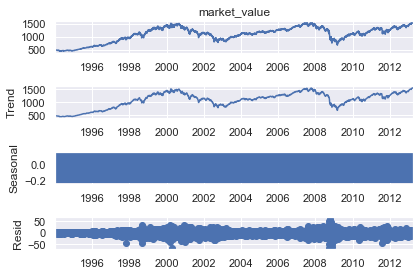

In [43]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

The observed time series is the actual time series we are decomposing. Therefore, it's not a main part, but rather the entire series.

The trend closely resembles the observed series, that is beause the decomposition function uses the previous period values as a *trend-setter*.
The seasonal plot looks like a rectangle, this happends when the values are constantly oscillating back and forth and the figure size is too small; in our case, the linear change results from constantly switching up and down between $-0.2$ and $0.1$ for every period, therefore there is no concrete cyclical pattern determined by using naive decomposition, the residual are the errors of our model estimates, essentially, they are the difference between true values and predictions for any period, the residual vary greatly around the turn of the century and aorund 2009.

Overall, the results of the additive decomposition suggest no seasonality in the data.

**Multiplicative:**

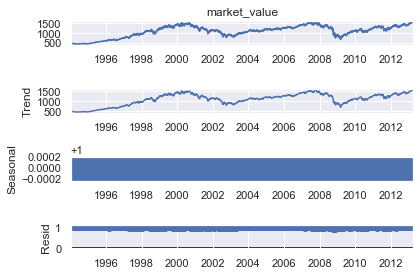

In [42]:
s_dec_multiplicative = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

We see very similar results to the first decomposition, the seasonal sequence has no clear pattern once again and the trend closely resembles the observed series. This is proof there is no seasonality among **S&P** prices.

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

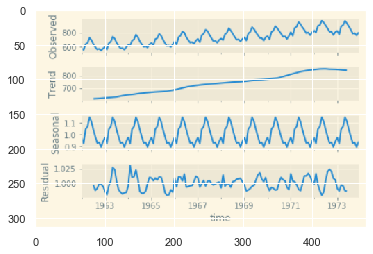

In [46]:
img = plt.imread('seasonality.png')
imgplot = plt.imshow(img)

Above is an example output of what data with clear seasonal patterns looks like and its decomposition.

If the cycle is like the one we examined, where it's very ambiguous what's happening on screen and there is no clear cycle, then the answer is *No* or there is **no seasonality**. However, if the cycles are clear and spread out, then that gives evidence of **seasonality** (or "Yes"). That being said, if the trend follows the observed closely, then the seasonal trend would be very low in magnitude compared to the trend, so it would have minimal effect.

### Autocorrelation

The correlation between a sequence and itself, more precisely, it measures the level of resemblance between a sequence from several periods ago and the actual data, such a a seres is called **lagged** because it is essentially a delayed version of the original one. In other words, *autocorrelatio* means that there is a correlation between the values of the *time-series* and a laggged version of itself.

For instance, if we find the *autocorrleation* for a *time-series* with daily frequency, we are determining how mucho of yesterday's values resemble today's values. If the frequency is instead annual, *autocorrelation* will measure the similarities from year to year.

### Autocorrelation Function in Time-Series (ACF) or HFC

This function help us to compute and compare *autocorrelation* values between different lags in simultaneously or the relationship between past values and the current one

$$
\begin{array}{lcr}
\rho (x_{t},x_{t-1}) \\
\rho (x_{t},x_{t-2}) \\
\rho (x_{t},x_{t-3}) \\
\cdots
\end{array}
$$

Time-series analyis common practice dictates analysing, in **plot_acf** method, the first 40 lags, the default number are the length of the *time-series*. In a set with thouseands of observations, computing so many lag values would be extremely time consumig. Keep in mind that by saying the frist 40 lags, we mean the last 40 periods before the current one.

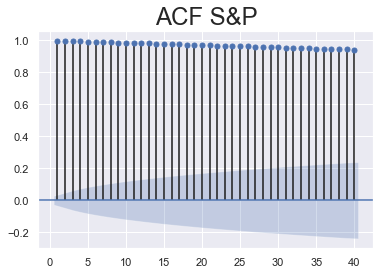

In [49]:
sgt.plot_acf(df.market_value, lags = 40, zero = False)
plt.title("ACF S&P", size = 24)
plt.show()

Values on the x-axis represent lags, meanwhile, on the left side of the plot, it indicates the possible values for the *autocorrelation* coefficient.

Correlation can only take values between $-1$ and $1$, which is why the graph stops at $1$.

The first line indicates *autocorrelation* one time period ago, the second line represents the coefficient value for two periods ago and so on.

The blue area around the x-axis represents significance. The values situated outside are significantly different from zero which suggests the existence of *autocorrelation* for that specific lag. Observe how this area expands as land values increase, the grater the distnace in time, the more unlikely it os that this *autocorrelation* presists. For instance today's prices are usually closer to yesterday's prices than the prices a month ago. Therefore, we need to make surre the autocorrelation coefficient in higher lags is sufficiently greater to be significantly different from zero.

Notice how all the line are higher than the blue region, this suggests the coefficients are significant which is an indicator of time dependence in the data. Moreover, we can see that *autocorrelation* barely diminishes as the lags increase. In the plot, this in turn suggests that prices even a month back can still serve as decent estimates.

Now, see whats happend whith *white-noise*:

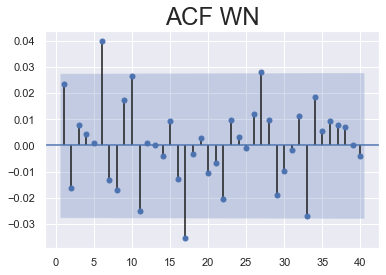

In [50]:
sgt.plot_acf(df.wn, lags = 40, zero = False)
plt.title("ACF WN", size = 24)
plt.show()

There are patterns of positive and negative *autocorrelation*, this constrasts the **ACF** for closing prices where all values were positive also observe how almost all the lines fall within the blue area. Thus, the coeficients are not significant across the entire plot, this suggests there is no *autocrrelation* for any lag which is one of the assumptions of **white noise**.

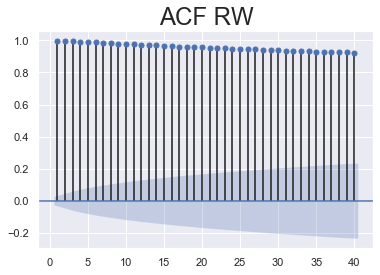

In [51]:
sgt.plot_acf(df.rw, lags = 40, zero = False)
plt.title("ACF RW", size = 24)
plt.show()

For *Random-Walk* there are similar results to the $S\$P$ plot.

### PACF

For instance, examine the value of the autocorrelation coefficient for the third lag, it captures direct and indirect ways in which the lagged series affects the original one by indirect.
We refer to all other channels through which pass data of *x* current data.

In this specific case these second hand effects come in the form of prices, three days ago affecting value two and one day ago which in turn affect present prices.

I f we wish to determine only the direct relationship between the *time-series* and its lagged version, we need to compute the partial *autocorrelation*. We can use function like the **HCF** called the partial auto correlation function or simply **PACF**

Depite the fact that there are several ways of computing the **PACF**, we will rely on the order of least squares method  (**OLS**).

**The difference between the ACF and the PACF is that the ACF measures the accumulated effects past lags have on the current value, while the PACF measures the direct effect.**

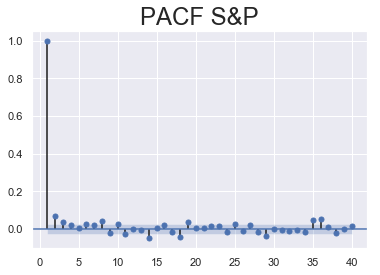

In [27]:
sgt.plot_pacf(df.market_value, lags = 40, zero = False, method = ('ols'))
plt.title("PACF S&P", size = 24)
plt.show()

Only the first several elements are significantly different from zero, this is  a tremendous contrast to the **HCF** plot where all values up to 40 lags were significant. Also some of the values like the nineth lag are negative.

This means that higher values, nine periods ago result in lower values today and vice versa, the difference between the two graph comes from the way **PACF** works: it cancels out all additional channels a previous period value effects the present one. For instance, the **PACF** measures the effect values in period $t-2$ on values in period $t$ directly:

$$
\begin{array}{lcr}
PACF : X_{t-2} \rightarrow X_{t} \\
Cancel \, out : X_{t-2} \rightarrow X_{t-1} \rightarrow X_{t}
\end{array}
$$

Compared to the values from the **HCF** function, the **PACF** ones cancel outs the effect prices two days ago have on prices yesterday which in turn affect prices today. Therefore the **ACF** shows the combined effect of the prices from two days ago, both direct and through yesterday's prices while the **PACF** only shows the direct effect.

Note that **HCF** and **PACF** values for the first lag should be identical, this is because there are no other channels through which passed values can affect present values also notice how most values after the third lag are within the blue area, this means they aren't significantly different from zero, so the numeric values attached to them are not important. Since we can assume they are all essentially zero being positive or negative is somewhat random without any lasting effects right.

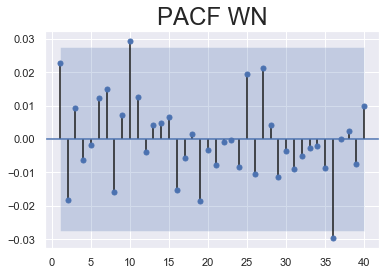

In [28]:
sgt.plot_pacf(df.wn, lags = 40, zero = False, method = ('ols'))
plt.title("PACF WN", size = 24)
plt.show()

Most of the values aren't significantly different from zero sum of the coefficients can end up outside the blue area and seem significant but that is completely random This aligns with our previous assumption that there exists no auto correlation in White-Noise.

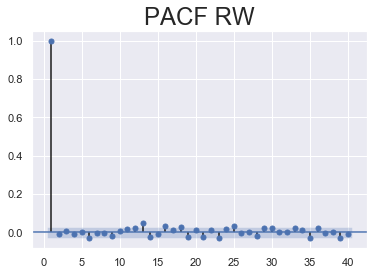

In [52]:
sgt.plot_pacf(df.rw, lags = 40, zero = False, method = ('ols'))
plt.title("PACF RW", size = 24)
plt.show()

Te conclussion are very similar to $S\$P$ case.